In [ ]:
# 코렙에서 한글 깨짐

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')



# 시도별 전출입 인구수 - 수업 중

- 데이터파일 확인
  - 대구의 지역별 이동 인구수 분석
  - 불필요한 컬럼이나 행이 있는지 확인
  - 결측치 정도 확인

- 데이터 전처리
  - 파일 확인 후 체크한 사항 진행
  - 결측치 처리
  - 이상치 처리
  - 중복데이터 처리
  - 형변환 => 실제 데이터와 타입 일치

- 데이터 가공 : 분석하고자 하는 데이터 형태
  - 행인덱스 처리 : 멀티인덱스/컬럼 -> 행인덱스/행인덱스 초기화
  - 필요한 컬럼 & 행 추출
  - 추가적인 결측치/이상치/중복데이터 처리
  - 형변환 => 연속형 -> 범주형, 범주형 -> 연속형
    - 분석 목적에 대해 가공됨

- 데이터 분석
  - 탐색적 분석(EDA) : 주어진 데이터를 기반으로 의미를 찾아내는 것
  - 시각화 및 분석 결과 텍스트 요약 정리

[1] 준비과정 : 모듈, 데이터

In [ ]:
# [1-1] 모듈 로딩

import pandas as pd # 데이터 분석용 모듈
import matplotlib.pyplot as plt # 데이터 시각화용 모듈

In [ ]:
# [1-2] 데이터 준비

file_name=r'/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/시도별 전출입 인구수.xlsx'


In [ ]:
# [1-3] data -> DataFrame 형태 저장

data_df=pd.read_excel(file_name)

[2] 데이터 확인 : 행과 컬럼 수 , 실제 데이터와 컬럼 타입, 결측치 체크

In [ ]:
# [2-1] 기본 정보 확인 -> info(), describe()
#  - 행 수, 컬럼 수, 컬럼별 결측치 아닌 (non-null) 데이터 수 , 컬럼별 데이터 타입
#  - 메모리 사용량

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [ ]:
# [2-2] 기본 정보 확인 -> info(), describe()
#  - 수치 데이터 컬럼의 데이터 분포 확인  : 최대값, 최소값, 표준편차, 사분위수, 평균값
#  - 범주 데이터 컬럼의 데이터 분포 확인 : 고유값, 가장 많이 나온 값, 가장 많이 나온 값의 빈도 수

data_df.describe()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [ ]:
data_df.describe(include='all') # 범주형 변수도 기초통계량 출력

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [ ]:
# [2-3] 실제 데이터 info()에서 확인한 타입 비교 => head()/tail()

data_df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


기본 정보 확인 후 결과
- 불필요한 행/컬럼 : 0번 행 삭제
- 결측치 : '전출지별' 컬럼 -> 이전 행 값으로 채우기
- 이상치 : 행별로 '-' 값이 수치값과 섞여 있음 -> 처리 필요 -> 0으로 처리 필요  

[3] 데이터 전처리 : 기본확인 파악된 내용들 처리
  - 기본 확인 파악된 내용들 처리
  - 불필요 데이터 삭제 : 0번행 삭제
  - 결측치 데이터 처리 : '전출지별' 컬럼 처리
  - 이상치 데이터 처리 : '-' 에 대한 처리
  - 데이터 자료형 일치 : 형변환

In [ ]:
# [3-1] 불필요 데이터 처리
copy_df=data_df.drop(0)
copy_df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [ ]:
# [3-2] 결측치 데이터 처리

copy_df.isna().sum()


전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [ ]:
copy_df.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [ ]:
copy_df[['1984','1985','1986']]

,1984,1985,1986
1,9043238,8679097,8660428
2,3052558,2784387,2683013
3,872967,821207,831658
4,552902,539361,533854
5,425509,409361,382620
...,...,...,...
320,656,634,621
321,3068,2883,2151
322,719,616,725
323,2093,1585,1548


In [ ]:
copy_df[['1984','1985','1986']].isna()==True

,1984,1985,1986
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
320,False,False,False
321,False,False,False
322,False,False,False
323,False,False,False


In [ ]:
copy_df_na=copy_df[['1984','1985','1986']].isna()==True

In [ ]:
copy_df_na

,1984,1985,1986
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
320,False,False,False
321,False,False,False
322,False,False,False
323,False,False,False


In [ ]:
copy_df_na[copy_df_na.sum(axis=1)>=1] # 여러 열을 다 더하면 한 행이 되므로 axis=1 사용 , 결측치가 있으면 데이터 타입이 float

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [ ]:
copy_df_na[['1984','1985','1986']].fillna(0,inplace=True)

In [ ]:
# 위에서  SettingWithCopyWarning가 떠서 copy로 변경

copy_df_na[['1984','1985','1986']]=copy_df_na[['1984','1985','1986']].fillna(0).copy()

In [ ]:
copy_df_na.isna().sum()

1984    0
1985    0
1986    0
dtype: int64

In [ ]:
copy_df_na[copy_df_na.sum(axis=1)>=1]

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


### inplace?

In [ ]:
df2=pd.DataFrame([[1,1,pd.NA],[pd.NA,pd.NA,2],[pd.NA,3,3]])
df2

,0,1,2
0,1,1,<NA>
1,<NA>,<NA>,2
2,<NA>,3,3


In [ ]:
# 0번 컬럼을 이전 행 값으로 채우기

df2[0]

0       1
1    <NA>
2    <NA>
Name: 0, dtype: object

In [ ]:
df2[0].ffill() # vs 에서 FutureWarning 발생

0    1
1    1
2    1
Name: 0, dtype: int64

In [ ]:
a=df2[0].ffill()
a

0    1
1    1
2    1
Name: 0, dtype: int64

In [ ]:
b=df2[0].ffill(inplace=True)
b # b에는 값이 없음 - 원본을 바꿔서 NONE return

In [ ]:
df2

,0,1,2
0,1,1,<NA>
1,1,<NA>,2
2,1,3,3


In [ ]:
df2[[1,2]]

,1,2
0,1,<NA>
1,<NA>,2
2,3,3


In [ ]:
df2[[1,2]].ffill()

,1,2
0,1,<NA>
1,1,2
2,3,3


In [ ]:
df2[[1,2]].ffill(inplace=True) # df2가 바뀌지 않음 - 데이터프레임 뽑음

<ipython-input-32-6e611d43093a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[[1,2]].ffill(inplace=True) # df2가 바뀌지 않음 - 데이터프레임 뽑음


In [ ]:
df2 # - 행을 하나 뽑으면 적용 됨

,0,1,2
0,1,1,<NA>
1,1,<NA>,2
2,1,3,3


In [ ]:
c=df2[[1,2]].ffill() # 변수에 저장해서 하면 df2의 값이 바뀜
df2[[1,2]]=c
df2

,0,1,2
0,1,1,<NA>
1,1,1,2
2,1,3,3




---







In [ ]:
# 전출지별

copy_df['전출지별'].ffill(inplace=True)

## 전출지별 결측값을 모두 변경하고
## 이후 데이터의 결측치를 0으로 바꿔도 ㅇ

### pd.set_option('future.no_silent_downcasting',True) <- vs에서 FutureWarning 발생 시 해결
# copy_df.fillna(0,inplace=True)

In [ ]:
copy_df.fillna(0,inplace=True) # 또는 copy_df=copy_df.fill(0) 사용 - 권고

In [ ]:
copy_df['전출지별']

1           전국
2           전국
3           전국
4           전국
5           전국
        ...   
320    제주특별자치도
321    제주특별자치도
322    제주특별자치도
323    제주특별자치도
324    제주특별자치도
Name: 전출지별, Length: 324, dtype: object

In [ ]:
copy_df


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [ ]:
copy_df[copy_df['전출지별']=='대구광역시']

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,-,-,-,-,-,-,-,-,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,-,-,-,-,-,-,-,-,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,-,-,-,-,-,-,-,-,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,-,-,-,-,-,-,-,-,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,-,-,-,-,-,-,-,-,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,-,-,-,-,-,-,-,-,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,-,-,-,-,-,-,-,-,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,-,-,-,-,-,-,-,-,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,261,233,526,879,642,827
64,대구광역시,경기도,-,-,-,-,-,-,-,-,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [ ]:
# [3-3] 이상치 데이터 처리

copy_df.replace('-',0,inplace=True)


=> 데이터 프레임 전체에서 inplace는 괜찮지만 일부 추출해서 inplace는 적용 안 될 수 있음

In [ ]:
copy_df.columns[2:].to_list()

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [ ]:
copy_df.shape

(324, 50)

In [ ]:
['int']*(copy_df.shape[1]-2)

['int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int']

In [ ]:
# [3-4] 자료형 변환

d_=dict(zip(copy_df.columns[2:].to_list(), ['int']*(copy_df.shape[1]-2)))

# dict 형태로 만들어서 '1970':'int' 형태로 만듦
copy_df=copy_df.astype(d_)

[4] 데이터 가공
  - 대구에서 전지역 전입 인구수 분석
  - 전출지별 - '대구광역시'
  - 전입지별 - '대구광역시','전국' 제외
  

In [ ]:
# - 대구 광역시 데이터만 추출

mask=(copy_df['전출지별']=="대구광역시")
city_df=copy_df[mask]
city_df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [ ]:
# - 전출지별 컬럼 삭제
city_df=city_df.drop('전출지별',axis=1)

# - 전입지별 컬럼 행 인덱스 설정
city_df.set_index('전입지별',inplace=True)

In [ ]:
# 대구 광역시, 전국 행 삭제
city_df.drop(['대구광역시','전국'], inplace=True)

In [ ]:
# 가공 데이터 확인

print(city_df.dtypes, city_df.columns, city_df.index, sep='\n\n')

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005

[5] 분석 : 대구에서 전지역 전입 인구수 분석

In [ ]:
# - 그래프 2개 - 시 / 도 - 년도와 상관 없이
# 대구에서 타지역 가는거

In [ ]:
# [5-1] 대구에서 타지역 이동 인구수 총합

In [ ]:
city_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
경기도,0,0,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354
강원도,0,0,0,0,0,0,0,0,0,0,...,1996,1942,2039,1843,1807,1820,1884,1884,1748,1657


In [ ]:
city_df['총 이동 인구 수'] = city_df.sum(axis=1)
city_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,총 이동 인구 수
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,15469,13915,13310,13838,13673,13735,13038,12802,13011,638316
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5207,5050,4906,5216,5543,6157,5182,4860,4840,258658
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2003,1968,2000,1979,2202,2015,1987,1962,1930,77043
광주광역시,0,0,0,0,0,0,0,0,0,0,...,624,527,577,711,622,902,629,547,515,18531
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2057,1956,2063,2144,2219,2254,2085,1949,1978,65964
울산광역시,0,0,0,0,0,0,0,0,0,0,...,3740,3551,3586,3844,3833,3835,3675,3266,2604,78498
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,261,233,526,879,642,827,3368
경기도,0,0,0,0,0,0,0,0,0,0,...,14534,14596,13320,13581,13659,12813,12322,11918,12354,418853
강원도,0,0,0,0,0,0,0,0,0,0,...,1942,2039,1843,1807,1820,1884,1884,1748,1657,80939


In [ ]:
city_df['총 이동 인구 수'].describe()

count    1.600000e+01
mean     2.800950e+05
std      5.320405e+05
min      3.368000e+03
25%      4.166925e+04
50%      7.777050e+04
75%      2.987068e+05
max      2.152105e+06
Name: 총 이동 인구 수, dtype: float64

In [ ]:
city_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype='object', name='전입지별')

In [ ]:
city_df.index[:7]

Index(['서울특별시', '부산광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시'], dtype='object', name='전입지별')

In [ ]:
city_df_c=city_df.index[:7]

In [ ]:
city_df['총 이동 인구 수'][:7]

전입지별
서울특별시      638316
부산광역시      258658
인천광역시       77043
광주광역시       18531
대전광역시       65964
울산광역시       78498
세종특별자치시      3368
Name: 총 이동 인구 수, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

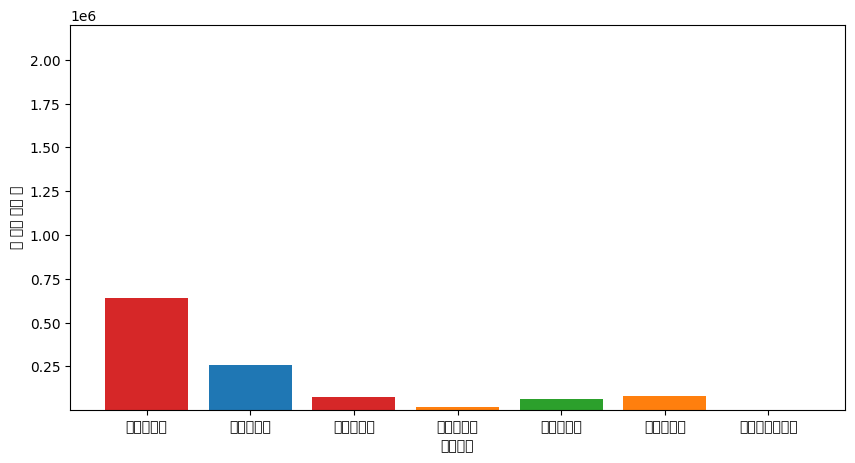

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange','tab:green','tab:orange','tab:brown','tab:purple']

plt.figure(figsize=[10,5])

plt.bar(city_df.index[:7],city_df['총 이동 인구 수'][:7],color=bar_colors)
plt.ylim(bottom=3000,top=2200000)
plt.xlabel("전입지별")
plt.ylabel("총 이동 인구 수")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

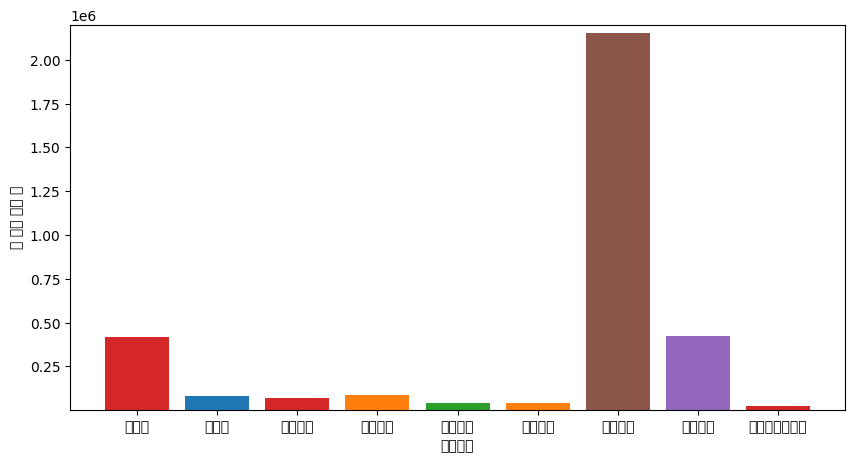

In [ ]:
plt.figure(figsize=[10,5])

plt.bar(city_df.index[7:],city_df['총 이동 인구 수'][7:],color=bar_colors)
plt.ylim(bottom=3000,top=2200000)
plt.xlabel("전입지별")
plt.ylabel("총 이동 인구 수")

plt.show()

## y축 share 사용

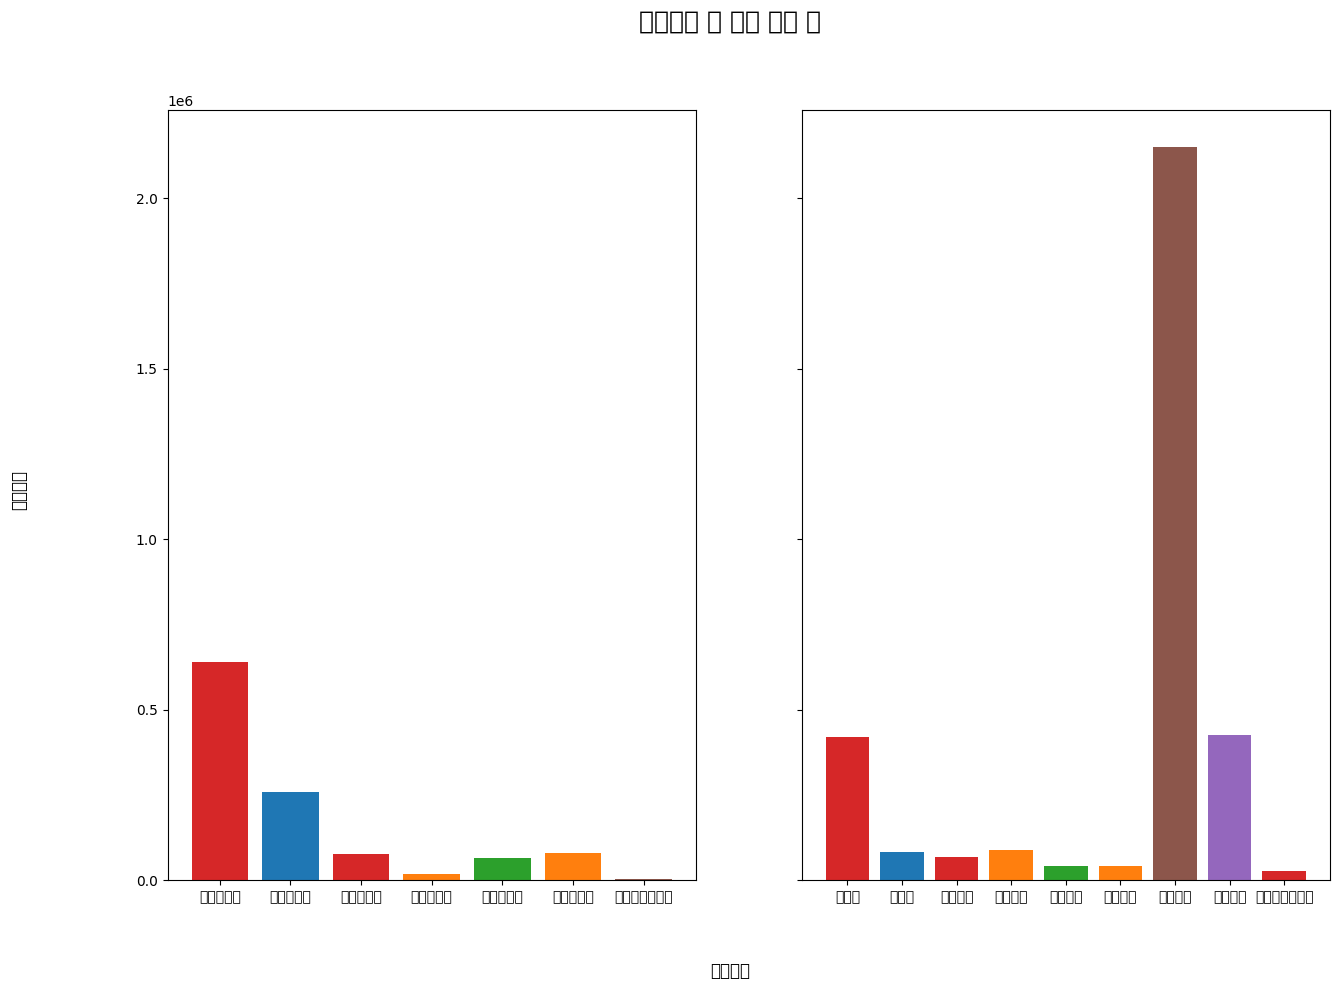

In [ ]:
fig=plt.figure(figsize=(15,10))
ax1,ax2=fig.subplots(1,2,sharey=True)

ax1.bar(city_df.index[:7],city_df['총 이동 인구 수'][:7],color=bar_colors)
ax2.bar(city_df.index[7:],city_df['총 이동 인구 수'][7:],color=bar_colors)


fig.suptitle("전입지별 총 이동 인구 수", fontsize=18)
fig.suptitle("전입지별 총 이동 인구 수", fontsize=18)
fig.supxlabel("전입지별")
fig.supylabel("전입지별")


plt.show()


# 막대 그래프 활용

## 누적 막대 그래프

In [ ]:
# [1] 모듈 로딩
import numpy as np

In [ ]:
# [2] 데이터 준비

species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]), # np.array : 배열 생성, 한 줄 이므로 1차원 배열
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence - 막대 너비



In [ ]:
sex_counts.items()

dict_items([('Male', array([73, 34, 61])), ('Female', array([73, 34, 58]))])

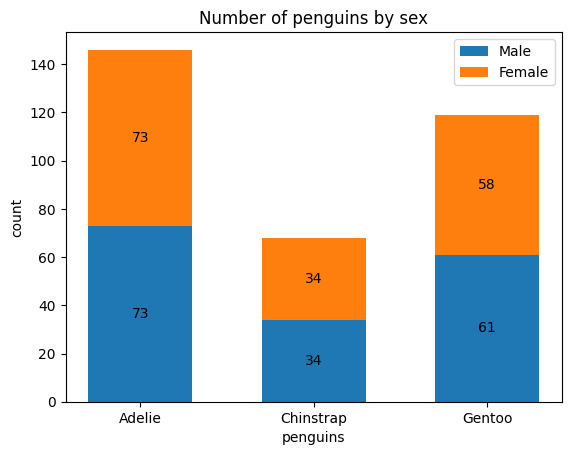

In [ ]:
# [3] 펭귄 품종 시각화
# - 품종에 따른 성별 비교

fig, ax = plt.subplots() # default로 1개 그림 , 언패킹으로 받음
bottom = np.zeros(3) # 0으로 채움

for sex, sex_count in sex_counts.items(): # sex_counts.items() 하면 2개 나옴
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count # 누적 시키기 위함

    ax.bar_label(p, label_type='center') # sex_counts 해당 숫자 적어줌 - 막대 그래프 내의 label 작성

# ax.set_title('Number of penguins by sex')
ax.set(title='Number of penguins by sex',xlabel="penguins", ylabel='count') # set_title 대신 사용 가능 -  메서드 3개 사용할 거를 변수 사용하여 하나로 대체
ax.legend()

plt.show()

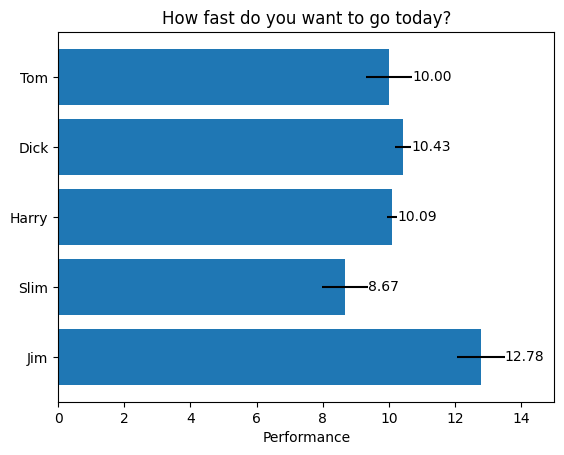

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people) # y축 눈금 지정
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f') # .bar_label : 그래프 오른쪽 수치 작성
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

## 다중 막대 그래프

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

species = ("Adelie", "Chinstrap", "Gentoo") # x축 데이터

# y축 데이터
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

# 그래프에 나타낼 x축 위치 값, 막대 그래프 너비, 다중 막대 그래프 간격 값
x = np.arange(len(species))  # the label locations -> (0,3,1)
width = 0.25  # the width of the bars
multiplier = 0  # 막대 그래프 간격



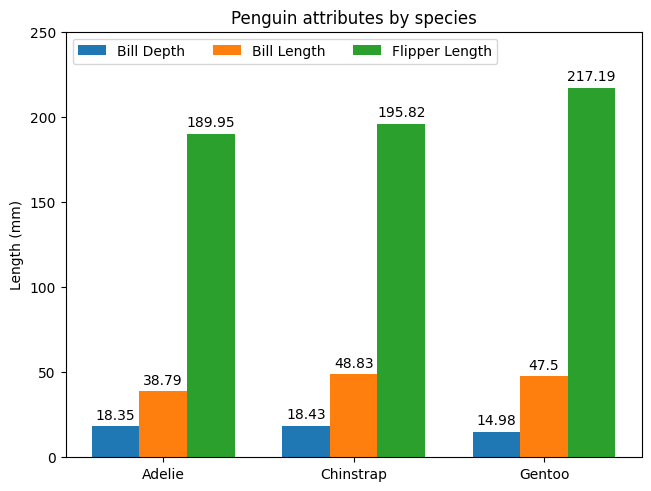

In [ ]:
# 품종별 특징 비교 다중 그래프

fig, ax = plt.subplots(layout='constrained') # 행과 열을 지정하지 않아서 1개


# 막대 그리기 -> 속성 하나로 3개 그려짐
for attribute, measurement in penguin_means.items():
    offset = width * multiplier # offset : 떨어져 있는 간격 - 0에서 부터 떨어진 간격
    rects = ax.bar(x + offset, measurement, width, label=attribute) # x는 (0,3,1)
    ax.bar_label(rects, padding=3) # padding : 막대 그래프 내부의 간격 -> 그래프 위에 글자 적을 때 공백 생김 , 막대그래프와 막대그래프 사이의 간격 : margin
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species) # 눈금
ax.legend(loc='upper left', ncols=3) # ncols : 범례가 옆으로 출력됨 - 기본은 아래로 출력
ax.set_ylim(0, 250)

plt.show()

# 히스토그램

### 시도별 전출입 인구수 데이터 중 전처리 후 가공된 데이터 사용

In [ ]:
city_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,총 이동 인구 수
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,15469,13915,13310,13838,13673,13735,13038,12802,13011,638316
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5207,5050,4906,5216,5543,6157,5182,4860,4840,258658
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2003,1968,2000,1979,2202,2015,1987,1962,1930,77043
광주광역시,0,0,0,0,0,0,0,0,0,0,...,624,527,577,711,622,902,629,547,515,18531
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2057,1956,2063,2144,2219,2254,2085,1949,1978,65964
울산광역시,0,0,0,0,0,0,0,0,0,0,...,3740,3551,3586,3844,3833,3835,3675,3266,2604,78498
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,261,233,526,879,642,827,3368
경기도,0,0,0,0,0,0,0,0,0,0,...,14534,14596,13320,13581,13659,12813,12322,11918,12354,418853
강원도,0,0,0,0,0,0,0,0,0,0,...,1942,2039,1843,1807,1820,1884,1884,1748,1657,80939


[5] 히스토그램으로 특정 컬럼 데이터 분포 시각화

In [ ]:
# 2000년도 데이터 분포
city_df.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '총 이동 인구 수'],
      dtype='object')

In [ ]:
city_df['2000']

전입지별
서울특별시      16970
부산광역시       5844
인천광역시       2209
광주광역시        531
대전광역시       2378
울산광역시       3465
세종특별자치시        0
경기도        13071
강원도         1889
충청북도        1824
충청남도        2087
전라북도        1016
전라남도         971
경상북도       52556
경상남도        7977
제주특별자치도      701
Name: 2000, dtype: int64

값 기준 정렬

In [ ]:
city_df['2000'].sort_values() # 값으로 정렬

전입지별
세종특별자치시        0
광주광역시        531
제주특별자치도      701
전라남도         971
전라북도        1016
충청북도        1824
강원도         1889
충청남도        2087
인천광역시       2209
대전광역시       2378
울산광역시       3465
부산광역시       5844
경상남도        7977
경기도        13071
서울특별시      16970
경상북도       52556
Name: 2000, dtype: int64

In [ ]:
city_df['2000'].sort_values(ascending=False) # 값으로 내림차순 정렬

전입지별
경상북도       52556
서울특별시      16970
경기도        13071
경상남도        7977
부산광역시       5844
울산광역시       3465
대전광역시       2378
인천광역시       2209
충청남도        2087
강원도         1889
충청북도        1824
전라북도        1016
전라남도         971
제주특별자치도      701
광주광역시        531
세종특별자치시        0
Name: 2000, dtype: int64

In [ ]:
city_df['2000'].index

Index(['서울특별시', '부산광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype='object', name='전입지별')

n => [11.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
bin => [    0.          3503.73333333  7007.46666667 10511.2
 14014.93333333 17518.66666667 21022.4        24526.13333333
 28029.86666667 31533.6        35037.33333333 38541.06666667
 42044.8        45548.53333333 49052.26666667 52556.        ]


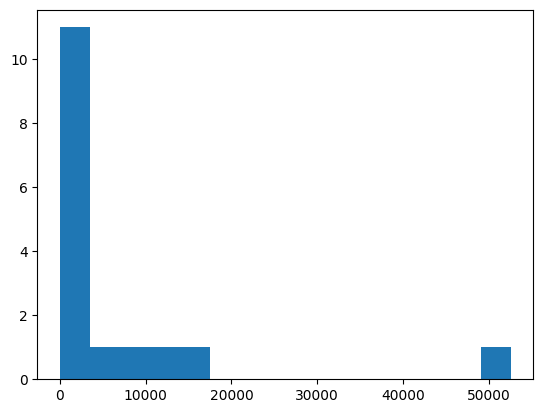

In [ ]:
# 2000년도 대구 지역에서 타지역으로 이동 인구수 분포


n,bin,obj=plt.hist(city_df['2000'], bins=15)
print(f'n => {n}')
print(f'bin => {bin}')

plt.show()


=> 데이터를 15개로 나눠서 시각화

n => [11.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
bin => [0.0, 3503.733333333333, 7007.466666666666, 10511.199999999999, 14014.933333333332, 17518.666666666664, 21022.399999999998, 24526.13333333333, 28029.866666666665, 31533.6, 35037.33333333333, 38541.066666666666, 42044.799999999996, 45548.53333333333, 49052.26666666666, 52556.0]


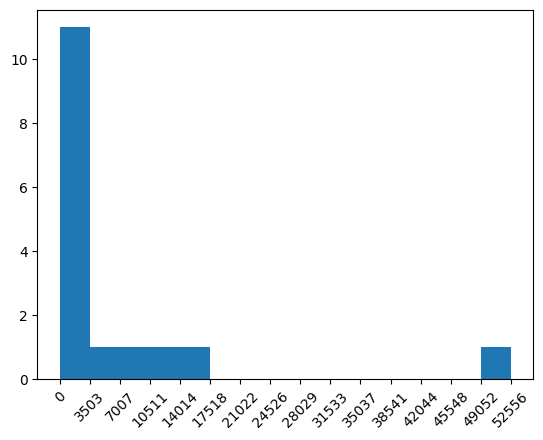

In [ ]:

n,bin,obj=plt.hist(city_df['2000'], bins=15) # 구간마다 들어가는 개수, 구간 (기준) , 그래프 객체
print(f'n => {n}')
print(f'bin => {bin.tolist()}')
labels=list(map(int,bin.tolist()))
plt.xticks(bin,labels,rotation=45) # 눈금의 숫자를 바꾸고 싶다면 사용
plt.show()


In [ ]:
labels

[0,
 3503,
 7007,
 10511,
 14014,
 17518,
 21022,
 24526,
 28029,
 31533,
 35037,
 38541,
 42044,
 45548,
 49052,
 52556]

n => [11.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
bin => [0.0, 3503.733333333333, 7007.466666666666, 10511.199999999999, 14014.933333333332, 17518.666666666664, 21022.399999999998, 24526.13333333333, 28029.866666666665, 31533.6, 35037.33333333333, 38541.066666666666, 42044.799999999996, 45548.53333333333, 49052.26666666666, 52556.0]


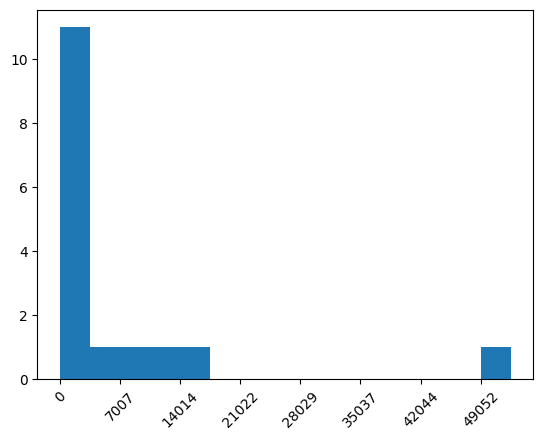

In [ ]:

n,bin,obj=plt.hist(city_df['2000'], bins=15)
print(f'n => {n}')
print(f'bin => {bin.tolist()}')
labels=list(map(int,bin.tolist()))
plt.xticks(bin[::2],labels[::2],rotation=45)
plt.show()


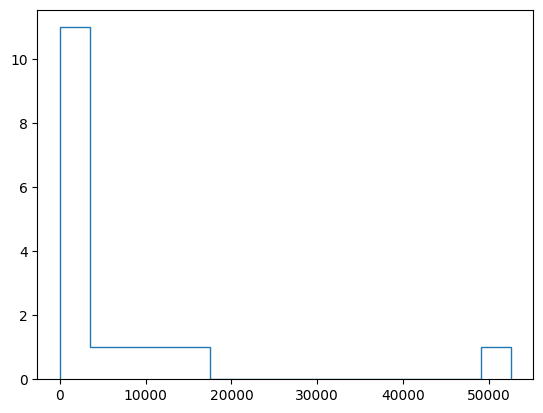

In [ ]:


plt.hist(city_df['2000'], bins=15, histtype='step') # step 은 테두리만
plt.show()

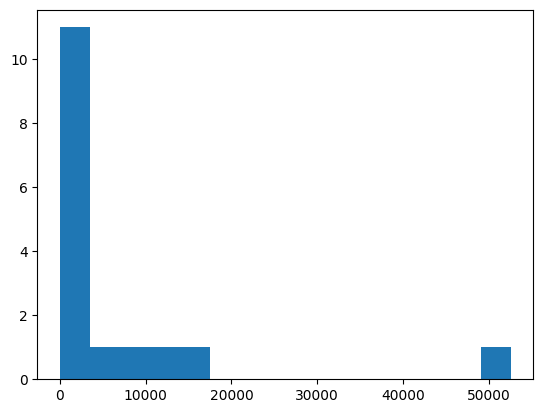

In [ ]:

plt.hist(city_df['2000'], bins=15, histtype='stepfilled') # stepfilled는 안을 채워줌
plt.show()

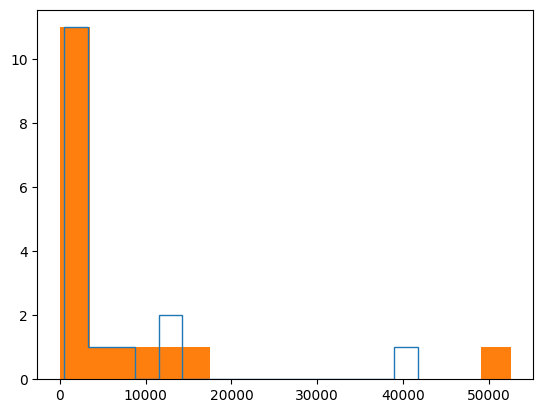

In [ ]:

plt.hist(city_df['2017'], bins=15, histtype='step') # step 은 테두리만
plt.hist(city_df['2000'], bins=15, histtype='stepfilled') # stepfilled는 안을 채워줌
plt.show()

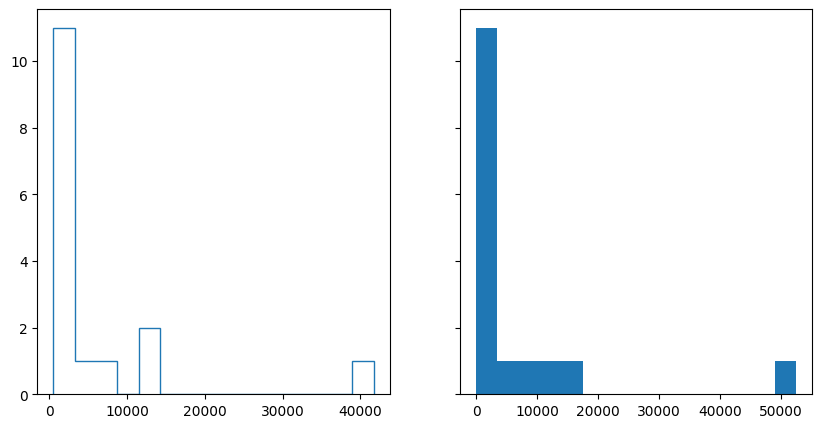

In [ ]:

fig=plt.figure(figsize=(10,5))
axs1, axs2=fig.subplots(1,2,sharey=True)

axs2.hist(city_df['2000'], bins=15, histtype='stepfilled') # stepfilled는 안을 채워줌
axs1.hist(city_df['2017'], bins=15, histtype='step') # step 은 테두리만
plt.show()

# 산점도 그래프
- 두개의 컬럼(변수) 관계를 시각화 해서 표현
- 연속형(수치형) 데이터에 사용

In [ ]:
# [1] 모듈 로딩

In [ ]:
# [2] 데이터 준비
f_data=r'/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/auto_mpg.csv'

In [ ]:
# [3] csv -> df

f_data_df=pd.read_csv(f_data)
f_data_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [ ]:
f_data_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인

f_data_df.corr(numeric_only=True)['mpg'].sort_values()

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
origin          0.563450
model year      0.579267
mpg             1.000000
Name: mpg, dtype: float64

In [ ]:
corr_result = f_data_df.corr(numeric_only=True)['mpg']
corr_result

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


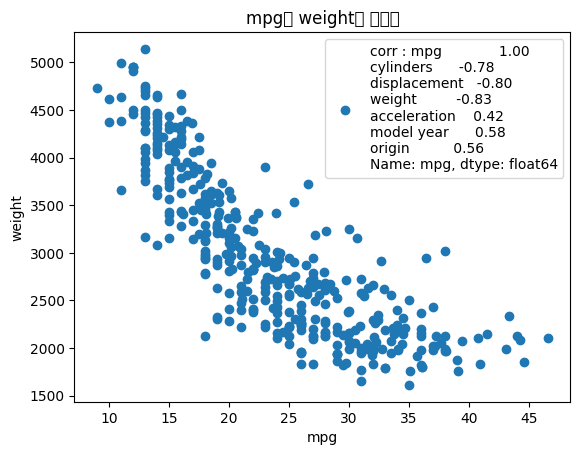

In [ ]:
# [4-2] 시각화

plt.scatter(f_data_df['mpg'],f_data_df['weight'],label=f'corr : {round(corr_result,2)}')
plt.xlabel("mpg")
plt.ylabel("weight")
plt.title("mpg와 weight의 산점도")
plt.legend()
plt.show()

In [ ]:
f_data_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
corr_result.index

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

cylinders
displacement
weight
acceleration
model year
origin


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

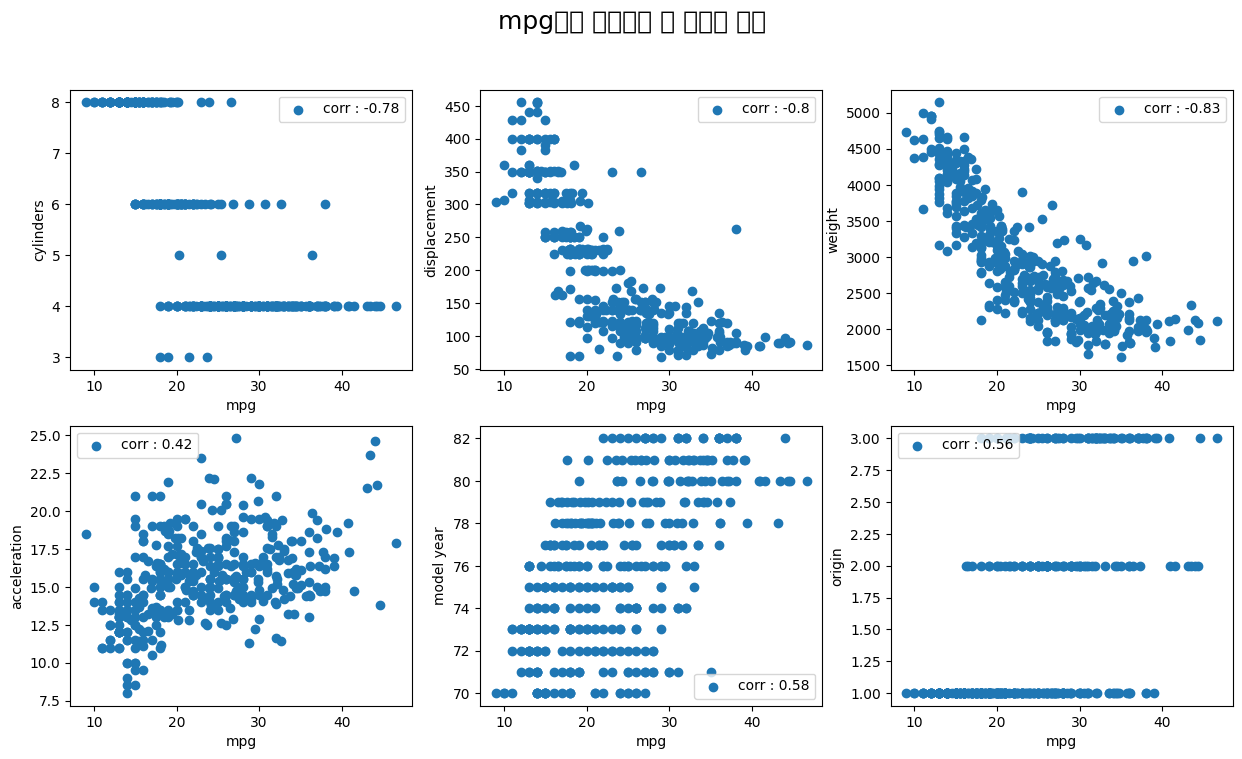

In [ ]:

fig=plt.figure(figsize=(15,8))

axes=fig.subplots(2,3)

for i in range(2):
  for j in range(3):
    corr_total_column=['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
    corr_result = f_data_df.corr(numeric_only=True)['mpg'][corr_total_column[i*3+j]]

    axes[i,j].scatter(f_data_df['mpg'],f_data_df[corr_total_column[i*3+j]],label=f'corr : {round(corr_result,2)}')
    axes[i,j].legend()
    axes[i,j].set_xlabel("mpg")
    axes[i,j].set_ylabel(f'{corr_total_column[i*3+j]}') # [i*3+j] 규칙성 발견하기
    print(corr_total_column[i*3+j])

fig.suptitle("mpg와의 상관관계 및 산점도 파악", fontsize=18)
plt.show()


In [ ]:
axes

array([[<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='mpg', ylabel='weight'>],
       [<Axes: xlabel='mpg', ylabel='acceleration'>,
        <Axes: xlabel='mpg', ylabel='model year'>,
        <Axes: xlabel='mpg', ylabel='origin'>]], dtype=object)

AttributeError: 'numpy.float64' object has no attribute 'index'

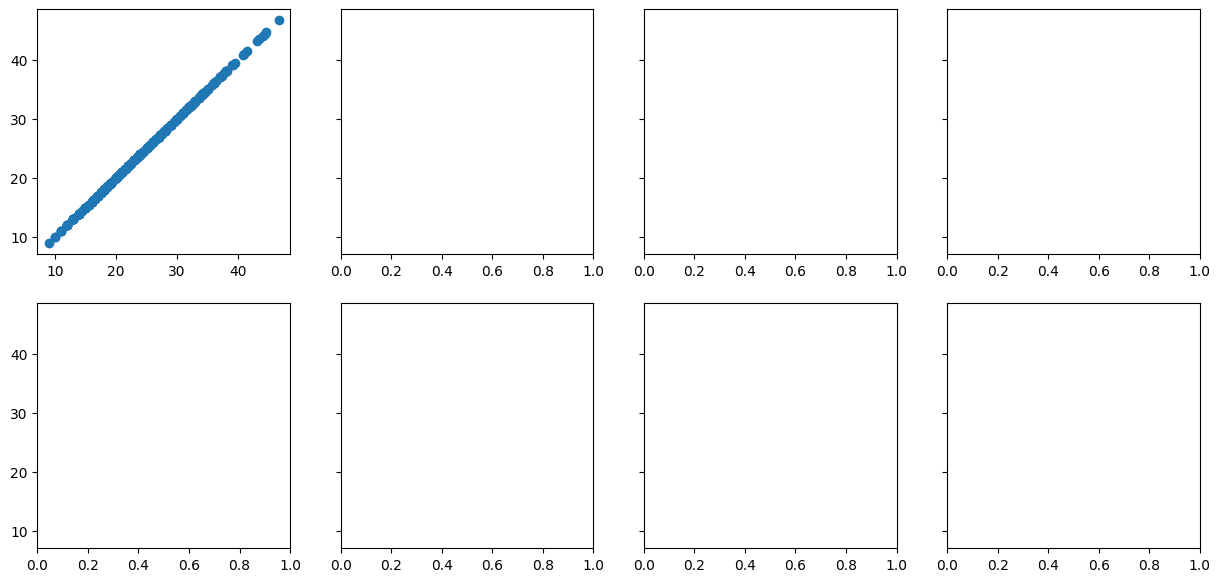

In [ ]:
# ?

fig=plt.figure(figsize=(15,7))

axs=fig.subplots(2,4, sharey=True)
axs[0,0].scatter(f_data_df['mpg'],f_data_df['mpg'])

for idx, ax in enumerate(axs):
  for col in range(4):
    axs[idx,col].scatter(f_data_df['mpg'], f_data_df[corr_result.index[idx+1]])


# 박스 그래프

In [ ]:
# [4] 컬럼별로 이상한 값 즉, 이상치 체크 및 시각화

f_data_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


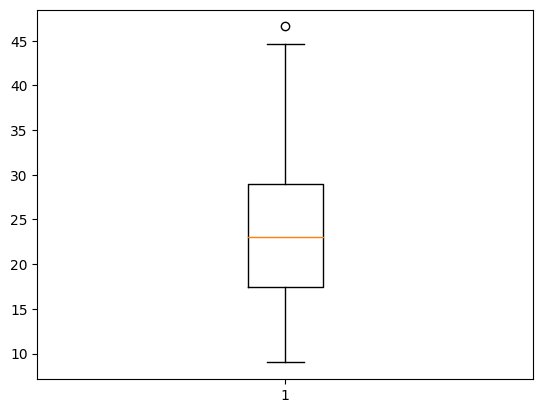

In [ ]:
# - 박스 그래프로 시각화
ret_dict=plt.boxplot(f_data_df['mpg']) # boxplot은 dict 형태로 반환
plt.show()

In [ ]:
# 박스 그래프에서 받은 결과 확인

for k, v in ret_dict.items():
  print(k,v) # 모두 다 선으로 구성되어 있으므로 matplotlib.lines.Line2D object
  for _ in v: # v 안에 있는 모든 리스트를 빼기 위함
    # print(_) # Line2D 형태로 나오니 점 찍으면 속성 뺼 수 ㅇ
    print(_.get_data())

whiskers [<matplotlib.lines.Line2D object at 0x7ec63f306170>, <matplotlib.lines.Line2D object at 0x7ec63f305c90>]
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 44.6]))
caps [<matplotlib.lines.Line2D object at 0x7ec63f305c30>, <matplotlib.lines.Line2D object at 0x7ec63f305810>]
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([44.6, 44.6]))
boxes [<matplotlib.lines.Line2D object at 0x7ec63f3062f0>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians [<matplotlib.lines.Line2D object at 0x7ec63f3055a0>]
(array([0.925, 1.075]), array([23., 23.]))
fliers [<matplotlib.lines.Line2D object at 0x7ec63f304f70>]
(array([1.]), array([46.6]))
means []


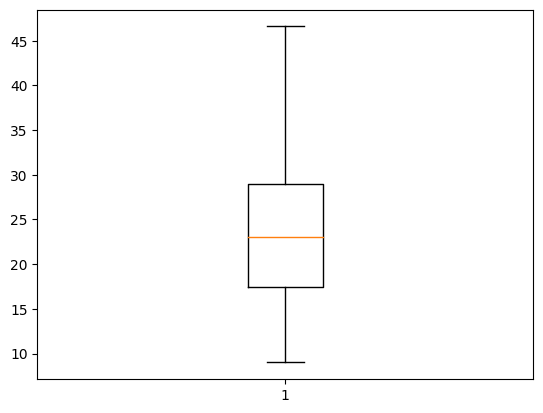

In [ ]:
ret_dict=plt.boxplot(f_data_df['mpg'],whis=2.5) # 결측치가 사라짐
plt.show()

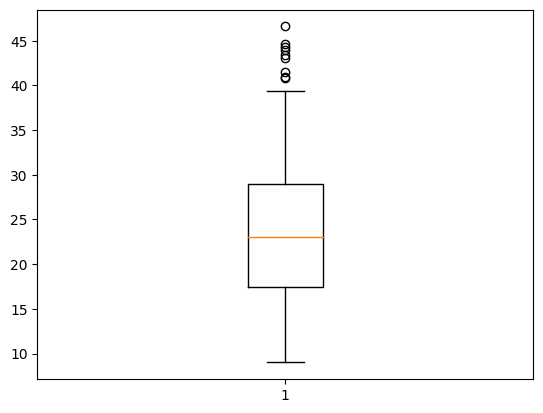

In [ ]:
ret_dict=plt.boxplot(f_data_df['mpg'],whis=1.0)  # 이상치가 많아짐
plt.show()

In [ ]:
# 박스 그래프에서 받은 결과 확인

for k, v in ret_dict.items():
  print(k,v) # 모두 다 선으로 구성되어 있으므로 matplotlib.lines.Line2D object
  for _ in v: # v 안에 있는 모든 리스트를 빼기 위함
    # print(_) # Line2D 형태로 나오니 점 찍으면 속성 뺼 수 ㅇ
    print(_.get_data())

whiskers [<matplotlib.lines.Line2D object at 0x7ec63e77b940>, <matplotlib.lines.Line2D object at 0x7ec63e5b1090>]
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 39.4]))
caps [<matplotlib.lines.Line2D object at 0x7ec63e5b1330>, <matplotlib.lines.Line2D object at 0x7ec63e5b15d0>]
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([39.4, 39.4]))
boxes [<matplotlib.lines.Line2D object at 0x7ec63e5b0c70>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians [<matplotlib.lines.Line2D object at 0x7ec63e5b1870>]
(array([0.925, 1.075]), array([23., 23.]))
fliers [<matplotlib.lines.Line2D object at 0x7ec63e5b1b10>]
(array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([43.1, 41.5, 46.6, 40.8, 44.3, 43.4, 44.6, 40.9, 44. ]))
means []


In [ ]:
ret_dict['caps'].get_data() # 반복문 또는 map 사용하여 데이터 뺄 수 있음

AttributeError: 'list' object has no attribute 'get_data'

In [ ]:
# 하위/상위 이상치 추출

outliers=ret_dict['caps']
outliers[0].get_data() # 1번 데이터를 뺌
outliers[1].get_data()

(array([0.9625, 1.0375]), array([39.4, 39.4]))

In [ ]:
outliers[0].get_data()[1].tolist(), outliers[1].get_data()[1].tolist() # 이상치 기준 뽑음

([9.0, 9.0], [39.4, 39.4])

In [ ]:
low_outlier=outliers[0].get_data()[1].tolist()[0]
up_outlier=outliers[1].get_data()[1].tolist()[0]

low_outlier,up_outlier

(9.0, 39.4)

In [ ]:
# 이상치 처리
f_data_df[f_data_df['mpg']<low_outlier]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [ ]:
f_data_df[f_data_df['mpg']>up_outlier]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
324,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


# 파이 그래프

In [ ]:
# [4] 특정 컬럼의 데이터 비율
# - 자동차 생산 국가에 대한 비율

f_data_df['origin']


0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [ ]:
f_data_df['origin'].astype('category')

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: category
Categories (3, int64): [1, 2, 3]

In [ ]:
# - 자동차 생산국가에 대한 비율
f_data_df['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [ ]:
f_data_df['origin'].count()

398

In [ ]:
f_data_df['origin'].value_counts()/f_data_df['origin'].count()

origin
1    0.625628
3    0.198492
2    0.175879
Name: count, dtype: float64

In [ ]:
round(f_data_df['origin'].value_counts()/f_data_df['origin'].count(),2) # round로 반올림

origin
1    0.63
3    0.20
2    0.18
Name: count, dtype: float64

In [ ]:
len(f_data_df['origin'].value_counts())

3

In [ ]:
f_data_df['origin'].value_counts().sort_index().index

Index([1, 2, 3], dtype='int64', name='origin')

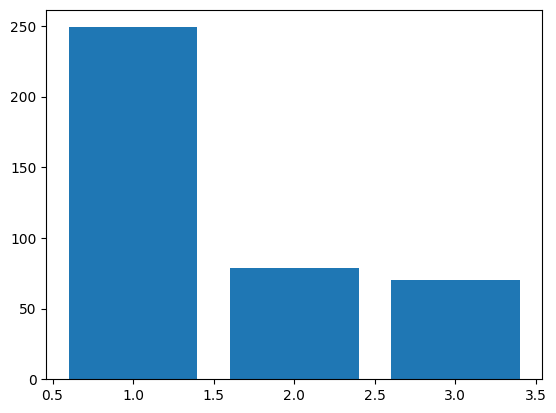

In [ ]:
# 자동차 생산국가에 대한 비율 시각화 - bar 그래프

plt.bar(f_data_df['origin'].value_counts().sort_index().index,f_data_df['origin'].value_counts())
plt.show()

In [ ]:
orgin_sr.index

Index([1, 3, 2], dtype='int64', name='origin')

In [ ]:
orgin_sr.values

array([249,  79,  70])

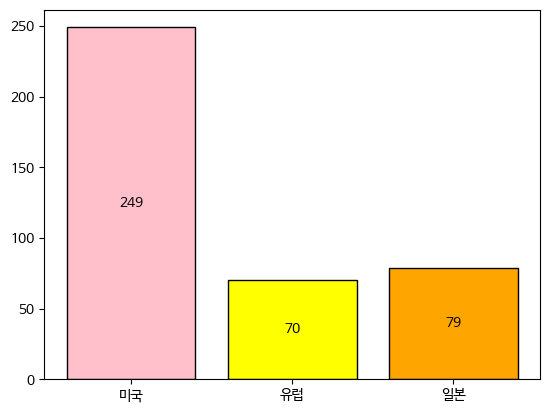

In [ ]:
orgin_sr=f_data_df['origin'].value_counts()
x=orgin_sr.index.to_list()
h=orgin_sr.values.tolist()

origin_bar=plt.bar(x,h, color=['pink','orange','yellow'], edgecolor='black')
plt.xticks([1,2,3],['미국','유럽','일본']) # xticks는 눈금이 찍히는 위치 값 , x축 눈금 설정
plt.bar_label(origin_bar,h, label_type="center") # 막대에 라벨 설정
plt.show()

In [ ]:
x,h

([1, 3, 2], [249, 79, 70])

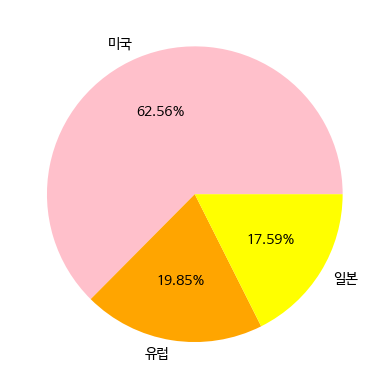

In [ ]:
# 자동차 생산국가에 대한 비율 시각화 - pie 그래프

plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'] ) # 자동으로 퍼센트 계산해줌 (문자열)

plt.show()

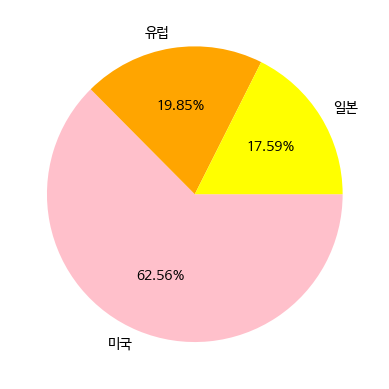

In [ ]:
# counterclock=False로 반시계 방향으로 그림

plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'],counterclock=False )

plt.show()

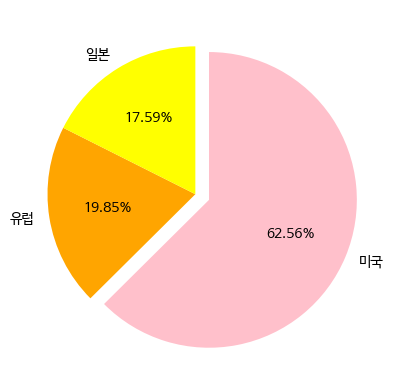

In [ ]:
# explode=[0.1,0,0]를 사용해서 그래프 간 간격 설정

plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'],counterclock=False, startangle=90, explode=[0.1,0,0] )

plt.show()

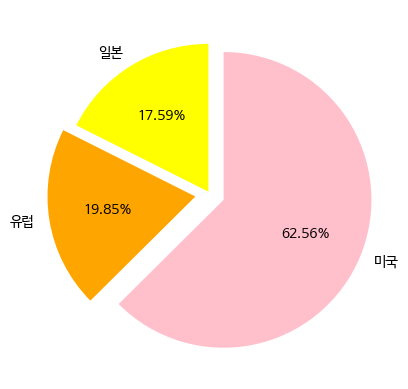

In [ ]:
plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'],counterclock=False, startangle=90, explode=[0.1,0.1,0.02] )

plt.show()

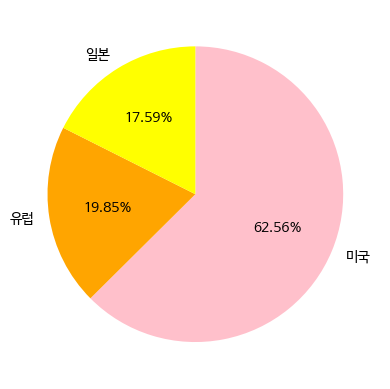

In [ ]:
plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'],counterclock=False, startangle=90)


plt.show()

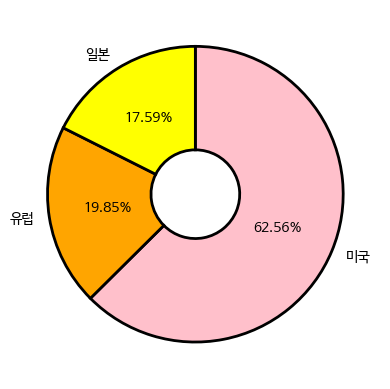

In [ ]:
plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'],counterclock=False, startangle=90,
        wedgeprops={'linewidth':2, 'width':0.7, 'edgecolor':'k'} )

# width : 내부의 홀 생김 , linewidth : 선 두께

plt.show()

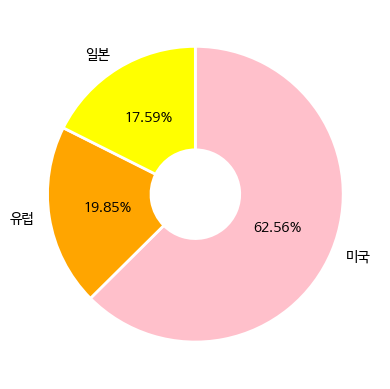

In [ ]:
plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'],counterclock=False, startangle=90,
        wedgeprops={'linewidth':2, 'width':0.7, 'edgecolor':'w'} )

# width : 내부의 홀 생김 ( 값이 커질수록 구멍이 작아짐 ) , linewidth : 그래프 간의 너비, 선 두께 => 색상을 흰색 주면 간격 떨어진 것으로 보임

plt.show()

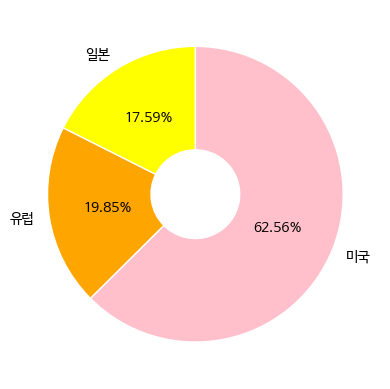

In [ ]:
plt.pie(h, labels=['미국','유럽','일본'],autopct='%.2f%%', colors=['pink','orange','yellow'],counterclock=False, startangle=90,
        wedgeprops={'width':0.7, 'edgecolor':'w'} )

# linewidth 안 주면 default 값으로 들어감

plt.show()

# 산점도 - 버블 그래프

cylinders
displacement
weight
acceleration
model year
origin


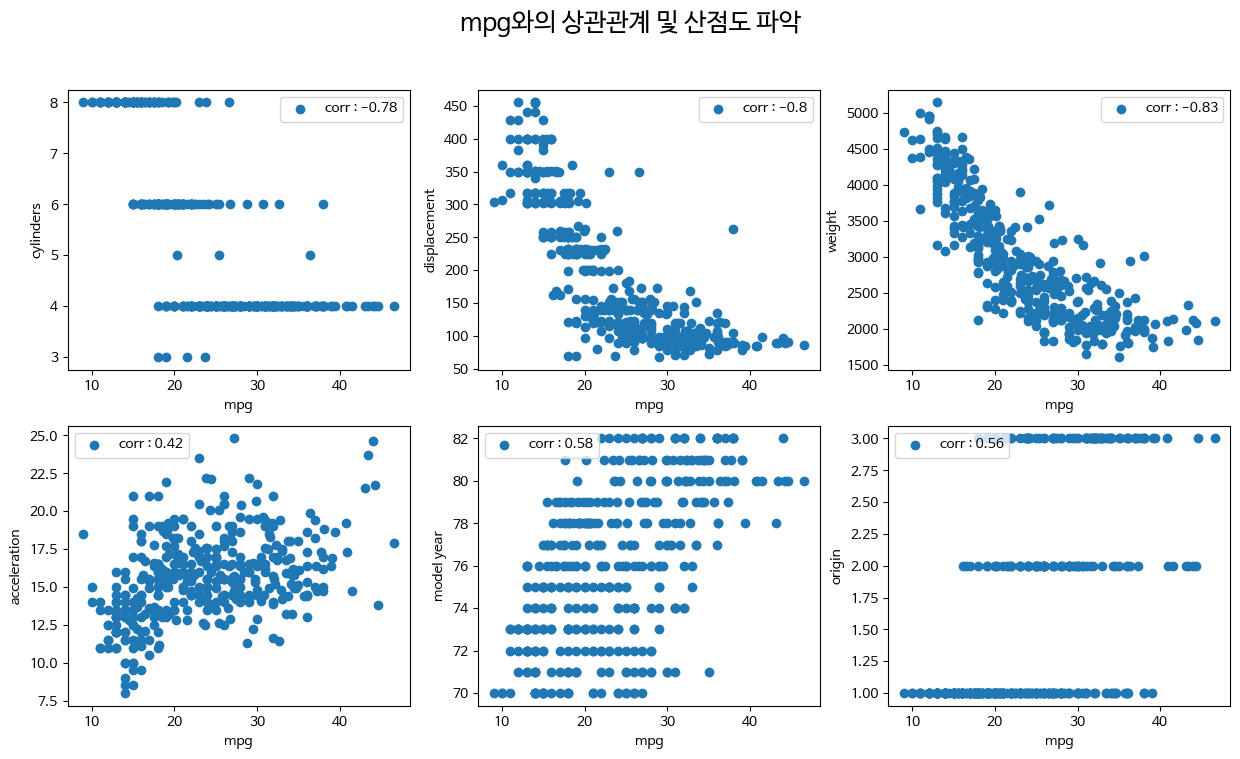

In [ ]:

fig=plt.figure(figsize=(15,8))

axes=fig.subplots(2,3)

for i in range(2):
  for j in range(3):
    corr_total_column=['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
    corr_result = f_data_df.corr(numeric_only=True)['mpg'][corr_total_column[i*3+j]]

    axes[i,j].scatter(f_data_df['mpg'],f_data_df[corr_total_column[i*3+j]],label=f'corr : {round(corr_result,2)}')
    axes[i,j].legend()
    axes[i,j].set_xlabel("mpg")
    axes[i,j].set_ylabel(f'{corr_total_column[i*3+j]}') # [i*3+j] 규칙성 발견하기
    print(corr_total_column[i*3+j])

fig.suptitle("mpg와의 상관관계 및 산점도 파악", fontsize=18)
plt.show()


[5] 연비와 무게, 실린더 수의 관계 시각화
  - 연비와 무게 반비례 관계 , 상관관계가 높음
  - 연비와 실린더 개수도 반비례 관계
    - 무게가 같아도 실린더 개수가 다르므로 무게, 실린더, 연비를 함께 보고자 함
      - 산점도의 크기를 실린더 개수로

In [ ]:
f_data_df['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [ ]:
f_data_df['cylinders']

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64

In [ ]:
f_data_df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

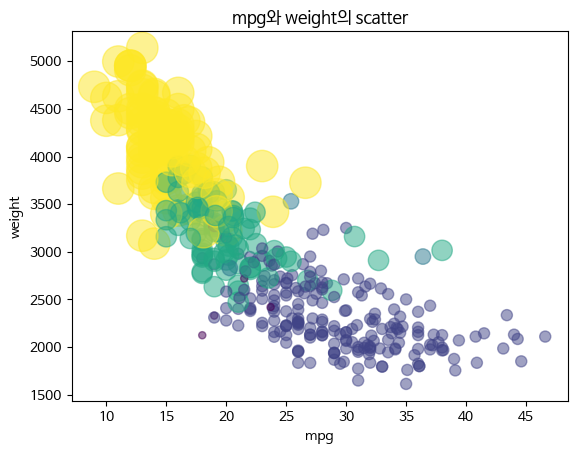

In [ ]:
# - mpg와 weight 관계 산점도 시각화

plt.scatter(f_data_df['mpg'],f_data_df['weight'], s=f_data_df['cylinders']**3, c=f_data_df['cylinders'], alpha=0.5) # f_data_df['cylinders']의 값들이 색상별로 들어감
plt.xlabel("mpg")
plt.ylabel("weight")
plt.title("mpg와 weight의 scatter")
plt.show()

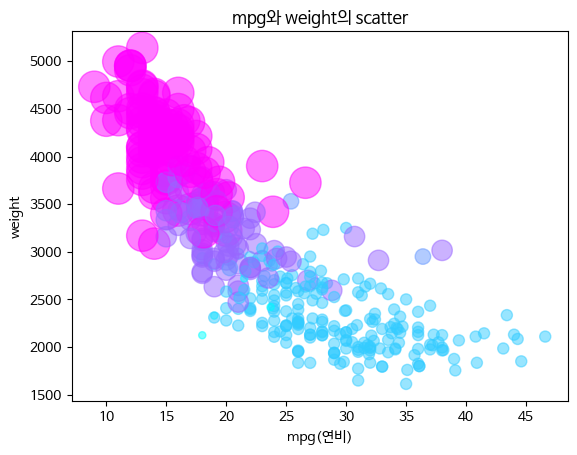

In [ ]:
plt.scatter(f_data_df['mpg'],f_data_df['weight'], s=f_data_df['cylinders']**3, c=f_data_df['cylinders'], alpha=0.5,cmap='cool')
plt.xlabel("mpg(연비)")
plt.ylabel("weight")
plt.title("mpg와 weight의 scatter")
plt.show()

실린더 개수가 많더라도 무게가 높으면 연비가 떨어진다